In [39]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [40]:
dataset = pd.read_csv("../data/infy_ml_dataset.csv", index_col=0)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 2019-03-12 to 2026-01-02
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   return            1688 non-null   float64
 1   sma_20            1688 non-null   float64
 2   sma_50            1688 non-null   float64
 3   rsi               1688 non-null   float64
 4   volatility        1688 non-null   float64
 5   nifty_return      1688 non-null   float64
 6   nifty_volatility  1688 non-null   float64
 7   banknifty_return  1688 non-null   float64
 8   target            1688 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 131.9+ KB


In [41]:
X = dataset.drop(columns=["target"])
y = dataset["target"]

In [42]:
split_ratio = 0.8
split_index = int(len(dataset) * split_ratio)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (1350, 8)
Test size : (338, 8)


In [43]:
print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))


Train target distribution:
target
1    0.572593
0    0.427407
Name: proportion, dtype: float64

Test target distribution:
target
1    0.502959
0    0.497041
Name: proportion, dtype: float64


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=600,
    max_depth=14,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",600
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",14
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [45]:
from sklearn.metrics import classification_report, accuracy_score

y_prob = rf_model.predict_proba(X_test)[:, 1]

# Default threshold (0.5)
y_pred = (y_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.5236686390532544

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.88      0.65       168
           1       0.59      0.17      0.26       170

    accuracy                           0.52       338
   macro avg       0.55      0.53      0.46       338
weighted avg       0.55      0.52      0.46       338



In [46]:
# More conservative buy signal
y_pred_55 = (y_prob > 0.55).astype(int)

print(classification_report(y_test, y_pred_55))


              precision    recall  f1-score   support

           0       0.50      0.92      0.64       168
           1       0.48      0.07      0.12       170

    accuracy                           0.49       338
   macro avg       0.49      0.50      0.38       338
weighted avg       0.49      0.49      0.38       338



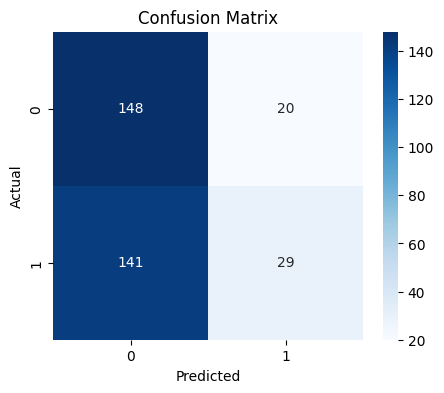

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [48]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


sma_50              0.184813
sma_20              0.160629
nifty_volatility    0.154248
volatility          0.137193
rsi                 0.124726
return              0.085548
banknifty_return    0.078791
nifty_return        0.074053
dtype: float64

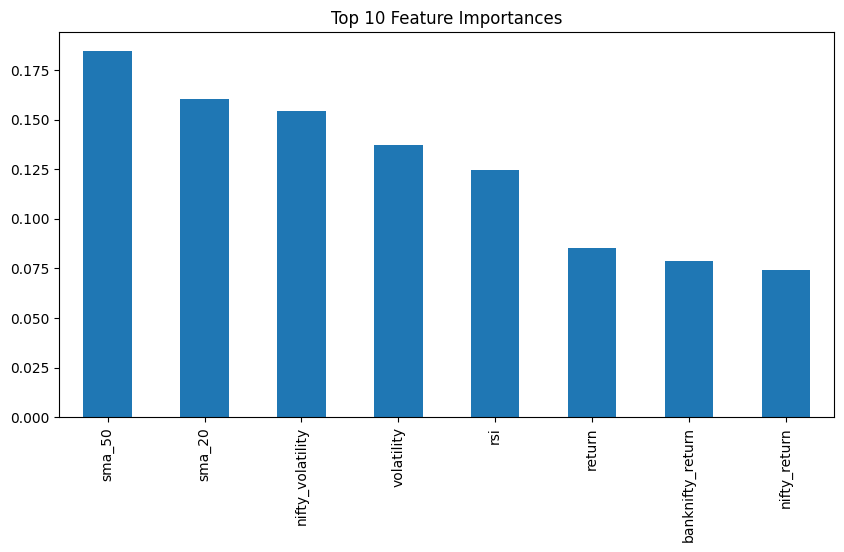

In [49]:
importances.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Feature Importances")
plt.show()


In [50]:
joblib.dump(rf_model, "../models/rf_infy.pkl")


['../models/rf_infy.pkl']